In [42]:
import cv2 as cv
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [43]:
class_label_encoding = {
    'SPOILED': 0,
    'HALF': 1,
    'FRESH': 2
}

# Load Images

In [44]:
def load_images(file_path, output_x, output_y):
    for file_name in os.listdir(file_path):
        class_name = file_name.split('-')[0]
        if (class_name == '_classes.csv'): continue
        img = cv.imread(file_path + file_name).astype('float32')
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (128, 128), interpolation = cv.INTER_AREA)
        img /= 255
        output_x.append(img)
        output_y.append(class_label_encoding[class_name])

In [46]:
train_x = []
train_y = []
test_x = []
test_y = []

load_images('data/train/', train_x, train_y)
load_images('data/valid/', test_x, test_y)

# Local Binary Pattern

In [47]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # if local neighbourhood pixel value is greater than or equal to center pixel values then set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # exception required when neighbourhood value of center pixel value is null
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # convert binary values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val


def lbp_output(img_bgr):
    height, width, _ = img_bgr.shape 
   
    # convert RGB to gray 
    img_gray = cv.cvtColor(img_bgr, 
                            cv.COLOR_BGR2GRAY) 
       
    # create numpy array as same height and width of RGB image 
    img_lbp = np.zeros((height, width), 
                       np.float32) 
       
    for i in range(0, height): 
        for j in range(0, width): 
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    return img_lbp

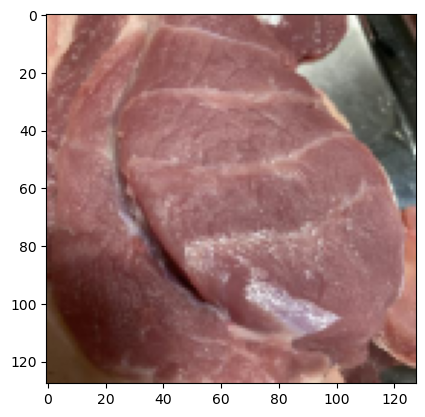

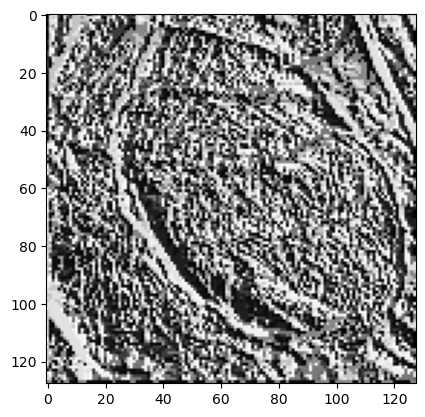

In [48]:
img_bgr = train_x[0]
img_lbp = lbp_output(img_bgr)
  
plt.imshow(img_bgr) 
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()

In [49]:
def save_images_lbp(imgs, labels, train_test='train'):
    label_text = ['SPOILED', 'HALF', 'FRESH']
    for image in range(len(imgs)):
        lbp_image = lbp_output(imgs[image])
        filename = f'data/lbp/{train_test}/{label_text[labels[image]]}-{image}-lbp.jpg'
        cv.imwrite(filename, lbp_image)

In [52]:
# save_images_lbp(train_x, train_y, train_test='train')

In [53]:
# save_images_lbp(test_x, test_y, train_test='test')

In [ ]:
def train_random_forest(x_train_forest, y_train_forest, x_test_forest, y_test_forest, n_estimators=100, criterion='gini', max_depth=None,
                        min_samples_split=2, min_samples_leaf=1, max_features='sqrt'):
    # Create Random Forest classifer object
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=42)
    
    # Train Random Forest Classifer
    clf.fit(x_train_forest,y_train_forest)
    
    #Predict the response for test dataset
    y_pred = clf.predict(x_test_forest)
    
    accuracy = accuracy_score(y_test_forest, y_pred)
    precision = precision_score(y_test_forest, y_pred)
    recall = recall_score(y_test_forest, y_pred)
    f1 = f1_score(y_test_forest, y_pred)
    confusion = confusion_matrix(y_test_forest, y_pred)

    return accuracy, precision, recall, f1